# AutoEncoders pour la Réduction de Dimension

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [4]:
data = make_blobs(
    n_samples=300,
    n_features=2,
    centers=2,
    cluster_std=1.0,
    random_state=101
)
data

(array([[ -8.87772115,  -6.76007802],
        [  0.630638  ,   3.10707466],
        [ -0.24060881,   2.82068999],
        [ -7.83909113,  -8.20754485],
        [-10.9729082 ,  -7.39067645],
        [-10.81648852,  -5.82372891],
        [  0.96977807,   0.50825184],
        [-10.29728144,  -7.21832357],
        [  0.04271579,   3.50389089],
        [  0.15391601,   2.19349145],
        [ -9.81008003,  -5.35480445],
        [-11.18334003,  -6.7004804 ],
        [  0.51876688,   3.39210906],
        [ -8.09111654,  -6.92631627],
        [  1.1112886 ,   0.704398  ],
        [ -7.49469451,  -7.06186612],
        [ -0.75249891,   2.31574949],
        [  0.72046137,   1.63484242],
        [ -0.80867204,   1.41371822],
        [  1.13010192,  -0.25418504],
        [-10.6252148 ,  -6.71479817],
        [ -0.06311641,   3.15682868],
        [  0.56609951,   3.41000402],
        [ -9.10474956,  -7.83047821],
        [-11.33926304,  -7.83622233],
        [  0.29639341,   2.06317757],
        [ -0

In [6]:
X,y = data

In [8]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [10]:
feat = pd.DataFrame(X)
print(feat.head())
feat = pd.concat([feat,z_noise],axis=1)
feat.columns = ['X1','X2','X3']
feat.head()

           0         1
0  -8.877721 -6.760078
1   0.630638  3.107075
2  -0.240609  2.820690
3  -7.839091 -8.207545
4 -10.972908 -7.390676


,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


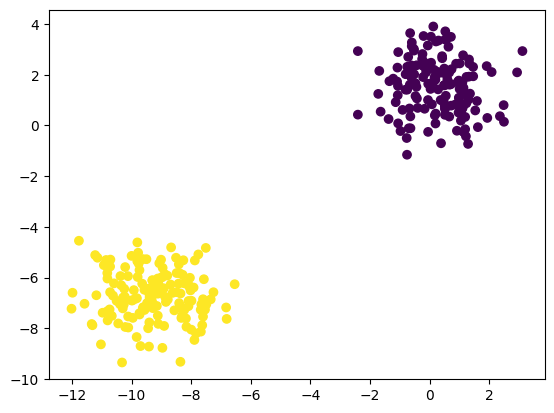

In [12]:
plt.scatter(feat['X1'],feat['X2'],c=y) # ils sont bien séparés

In [13]:
from mpl_toolkits.mplot3d import Axes3D

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#scatter-plots

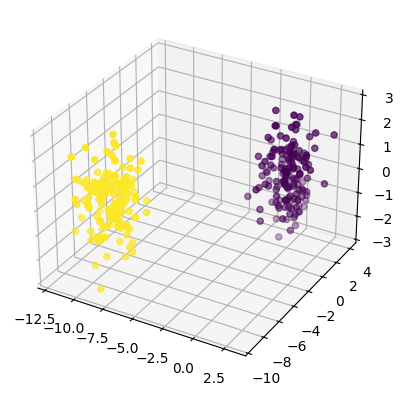

In [15]:
# affichage en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)
# la feature X3 est inutile elle n'est là que pour la démo pour apporter du bruit

# Encoder et Decoder

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# SGD = Stochastic Gradient Descent
# 3 --> 2 --> 3 

In [39]:
# 3 --> 2
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [40]:
# 2 ---> 3
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [41]:
# ENCODER
# 3 ---> 2 ----> 3
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(learning_rate=1.5))
# on peut ajuster le SGD pour avoir un meilleur résultat. Plus le learning_rate est grand plus le résultat est rapide mais moins précis

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
# Notez comment toutes les données sont utilisées ! Il n'y a pas de "bonne" réponse ici
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [44]:
# scaled_data

In [45]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5


10/10 [==============================] - 1s 3ms/step - loss: 0.3350
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 0.3350
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 0.3350
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 0.3350
Epoch 5/5
10/10 [==============================] - 0s 5ms/step - loss: 0.3350


In [46]:
encoded_2dim = encoder.predict(scaled_data)

10/10 [==============================] - 0s 1ms/step


In [50]:
print(scaled_data.shape)
print(encoded_2dim.shape) # réduction de 3 à 2 dim 
encoded_2dim

(300, 3)
(300, 2)


array([[0.00000000e+00, 0.00000000e+00],
       [6.39519215e-01, 3.34655106e-01],
       [5.68749309e-01, 2.68467426e-01],
       [1.74728327e-03, 3.96383964e-02],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [7.16740191e-01, 4.99673367e-01],
       [0.00000000e+00, 0.00000000e+00],
       [8.08884382e-01, 4.52693880e-01],
       [5.89879334e-01, 3.16336066e-01],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [6.70932591e-01, 3.48913133e-01],
       [1.04103357e-01, 7.55901337e-02],
       [7.33873665e-01, 5.09833217e-01],
       [7.81693496e-03, 1.02283051e-02],
       [5.85124552e-01, 2.90730357e-01],
       [5.18850625e-01, 2.86968261e-01],
       [3.89915317e-01, 1.56704232e-01],
       [5.99602401e-01, 4.30861056e-01],
       [0.00000000e+00, 0.00000000e+00],
       [5.26954412e-01, 2.24388063e-01],
       [8.11573744e-01, 4.68266815e-01],
       [6.40837029e-02, 5.48942797e-02],
       [0.000000

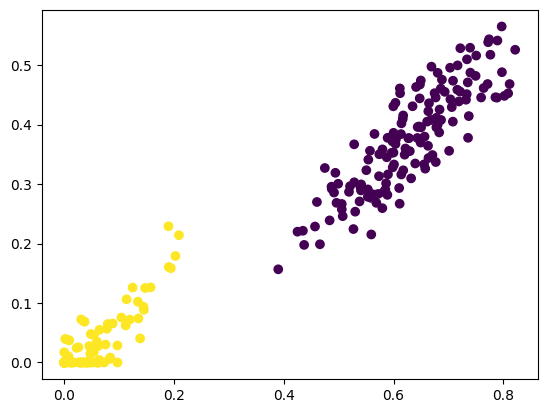

In [49]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)